# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
#from gi.overrides.GObject import features
%matplotlib inline

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print(f"Сиды в домашках фиксируются для того, чтобы генераторы случайных чисел все время выдавали одни и те же последовательности значений. Если случайные значения все время будут разными, то не будет повторяемости результатов, и, соответственно, 1) сложно сравнивать результаты применения разных моделей, они всегда будут хоть немного, но отличаться для различных случайных последовательностей, так, например, будут по-разному сгенерированы выборки test и train 2) выводы могут не сойтись с результатами очередного запуска расчетов.")

Сиды в домашках фиксируются для того, чтобы генераторы случайных чисел все время выдавали одни и те же последовательности значений. Если случайные значения все время будут разными, то не будет повторяемости результатов, и, соответственно, 1) сложно сравнивать результаты применения разных моделей, они всегда будут хоть немного, но отличаться для различных случайных последовательностей, так, например, будут по-разному сгенерированы выборки test и train 2) выводы могут не сойтись с результатами очередного запуска расчетов.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [38]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.loc[random.sample(range(df_train.shape[0]), 10)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5238,Ford Freestyle Trend Diesel BSIV,2018,675000,60000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
912,Mercedes-Benz E-Class E250 CDI Avantgarde,2016,2900000,31000,Diesel,Dealer,Automatic,First Owner,13.0 kmpl,2143 CC,204 bhp,500Nm@ 1600-1800rpm,5.0
204,Hyundai Creta 1.6 CRDi SX Plus Dual Tone,2017,1100000,37000,Diesel,Individual,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0
6074,Toyota Innova 2.5 E Diesel MS 8-seater,2007,409999,248119,Diesel,Individual,Manual,Fourth & Above Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0
2253,Maruti Wagon R LXI CNG,2011,200000,137000,CNG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0
2006,Maruti Wagon R LXI BS IV,2016,350000,70000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
1828,Maruti Swift Dzire LDi,2010,215000,120000,Diesel,Individual,Manual,Third Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
1143,Maruti Celerio VDi,2015,250000,100000,Diesel,Individual,Manual,Second Owner,27.62 kmpl,793 CC,47 bhp,125Nm@ 2000rpm,5.0
6033,Hyundai i20 Sportz 1.2,2013,315000,49000,Petrol,Individual,Manual,Second Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
839,Maruti Wagon R VXI BS IV,2011,200000,94000,Petrol,Individual,Manual,Third Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
display(df_test.head())
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
display(df_train.describe(include='all'))
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [7]:
print(f'Пропуски в трейне есть в следующих колонках: {", ".join(df_train.columns[df_train.isna().any()])}')
print(f'Пропуски в тесте есть в следующих колонках: {", ".join(df_test.columns[df_test.isna().any()])}')

Пропуски в трейне есть в следующих колонках: mileage, engine, max_power, torque, seats
Пропуски в тесте есть в следующих колонках: mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [8]:
features_columns = [x for x in df_train.columns.values if x != 'selling_price']
df_train_dupl = df_train[df_train.duplicated(subset=features_columns)]
print(f'В трейне найдено {df_train_dupl.shape[0]} строк с неуникальным набором признаков (за исключением целевой переменной selling_price) из {df_train.shape[0]} строк')

В трейне найдено 1159 строк с неуникальным набором признаков (за исключением целевой переменной selling_price) из 6999 строк


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [9]:
df_train[df_train.duplicated(subset=features_columns, keep=False)].sort_values(features_columns + ['selling_price'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5991,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [10]:
df_train.drop_duplicates(subset=features_columns, inplace=True)

In [11]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [12]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [13]:
from cartransformer import CarTransformer

df_train = CarTransformer.transform_value_columns(df_train)
df_test = CarTransformer.transform_value_columns(df_test)

display(df_train.head())
display(df_train.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.67,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.78,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0,4000.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.67,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.78,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0,4000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [14]:
from sklearn import impute

def fill_nan(df):
    nan_cols = ['mileage', 'engine', 'max_power', 'seats', 'torque', 'max_torque_rpm']
    df_to_fill_na = df.loc[:, nan_cols]
    df_to_not_fill_na = df.loc[:, [x for x in df.columns if x not in nan_cols]]
    mis_replacer = impute.SimpleImputer(strategy="median")
    df_to_fill_na = pd.DataFrame(data=mis_replacer.fit_transform(df_to_fill_na), columns=nan_cols)
    df_full = pd.concat([df_to_not_fill_na, df_to_fill_na], axis=1)
    return df_full

df_train = fill_nan(df_train)
print(f'df_train has missing values: {df_train.isna().any().any()}')

df_test = fill_nan(df_test)
print(f'df_test has missing values: {df_test.isna().any().any()}')

df_train has missing values: False
df_test has missing values: False



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [15]:
display(df_train.groupby(['seats']).groups.keys())
print("1) Кол-во сидений (seats) может принимать ограниченный набор значений и они не непрерывны. 2) Цена не будет расти линейно с увеличением кол-ва сидений для всех кол-в, потому что с 2мя сидениями могут часто встречаться дорогие спортивные автомобили, машины с 4мя сидения могут в среднем оказаться дешевле, при том что с 5ю и т.д. уже дороже")

dict_keys([2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 14.0])

1) Кол-во сидений (seats) может принимать ограниченный набор значений и они не непрерывны. 2) Цена не будет расти линейно с увеличением кол-ва сидений для всех кол-в, потому что с 2мя сидениями могут часто встречаться дорогие спортивные автомобили, машины с 4мя сидения могут в среднем оказаться дешевле, при том что с 5ю и т.д. уже дороже


In [16]:
CarTransformer.convert_values_to_int(df_train)
CarTransformer.convert_values_to_int(df_test)
df_train.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int64
max_power         float64
seats               int64
torque            float64
max_torque_rpm      int64
dtype: object

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

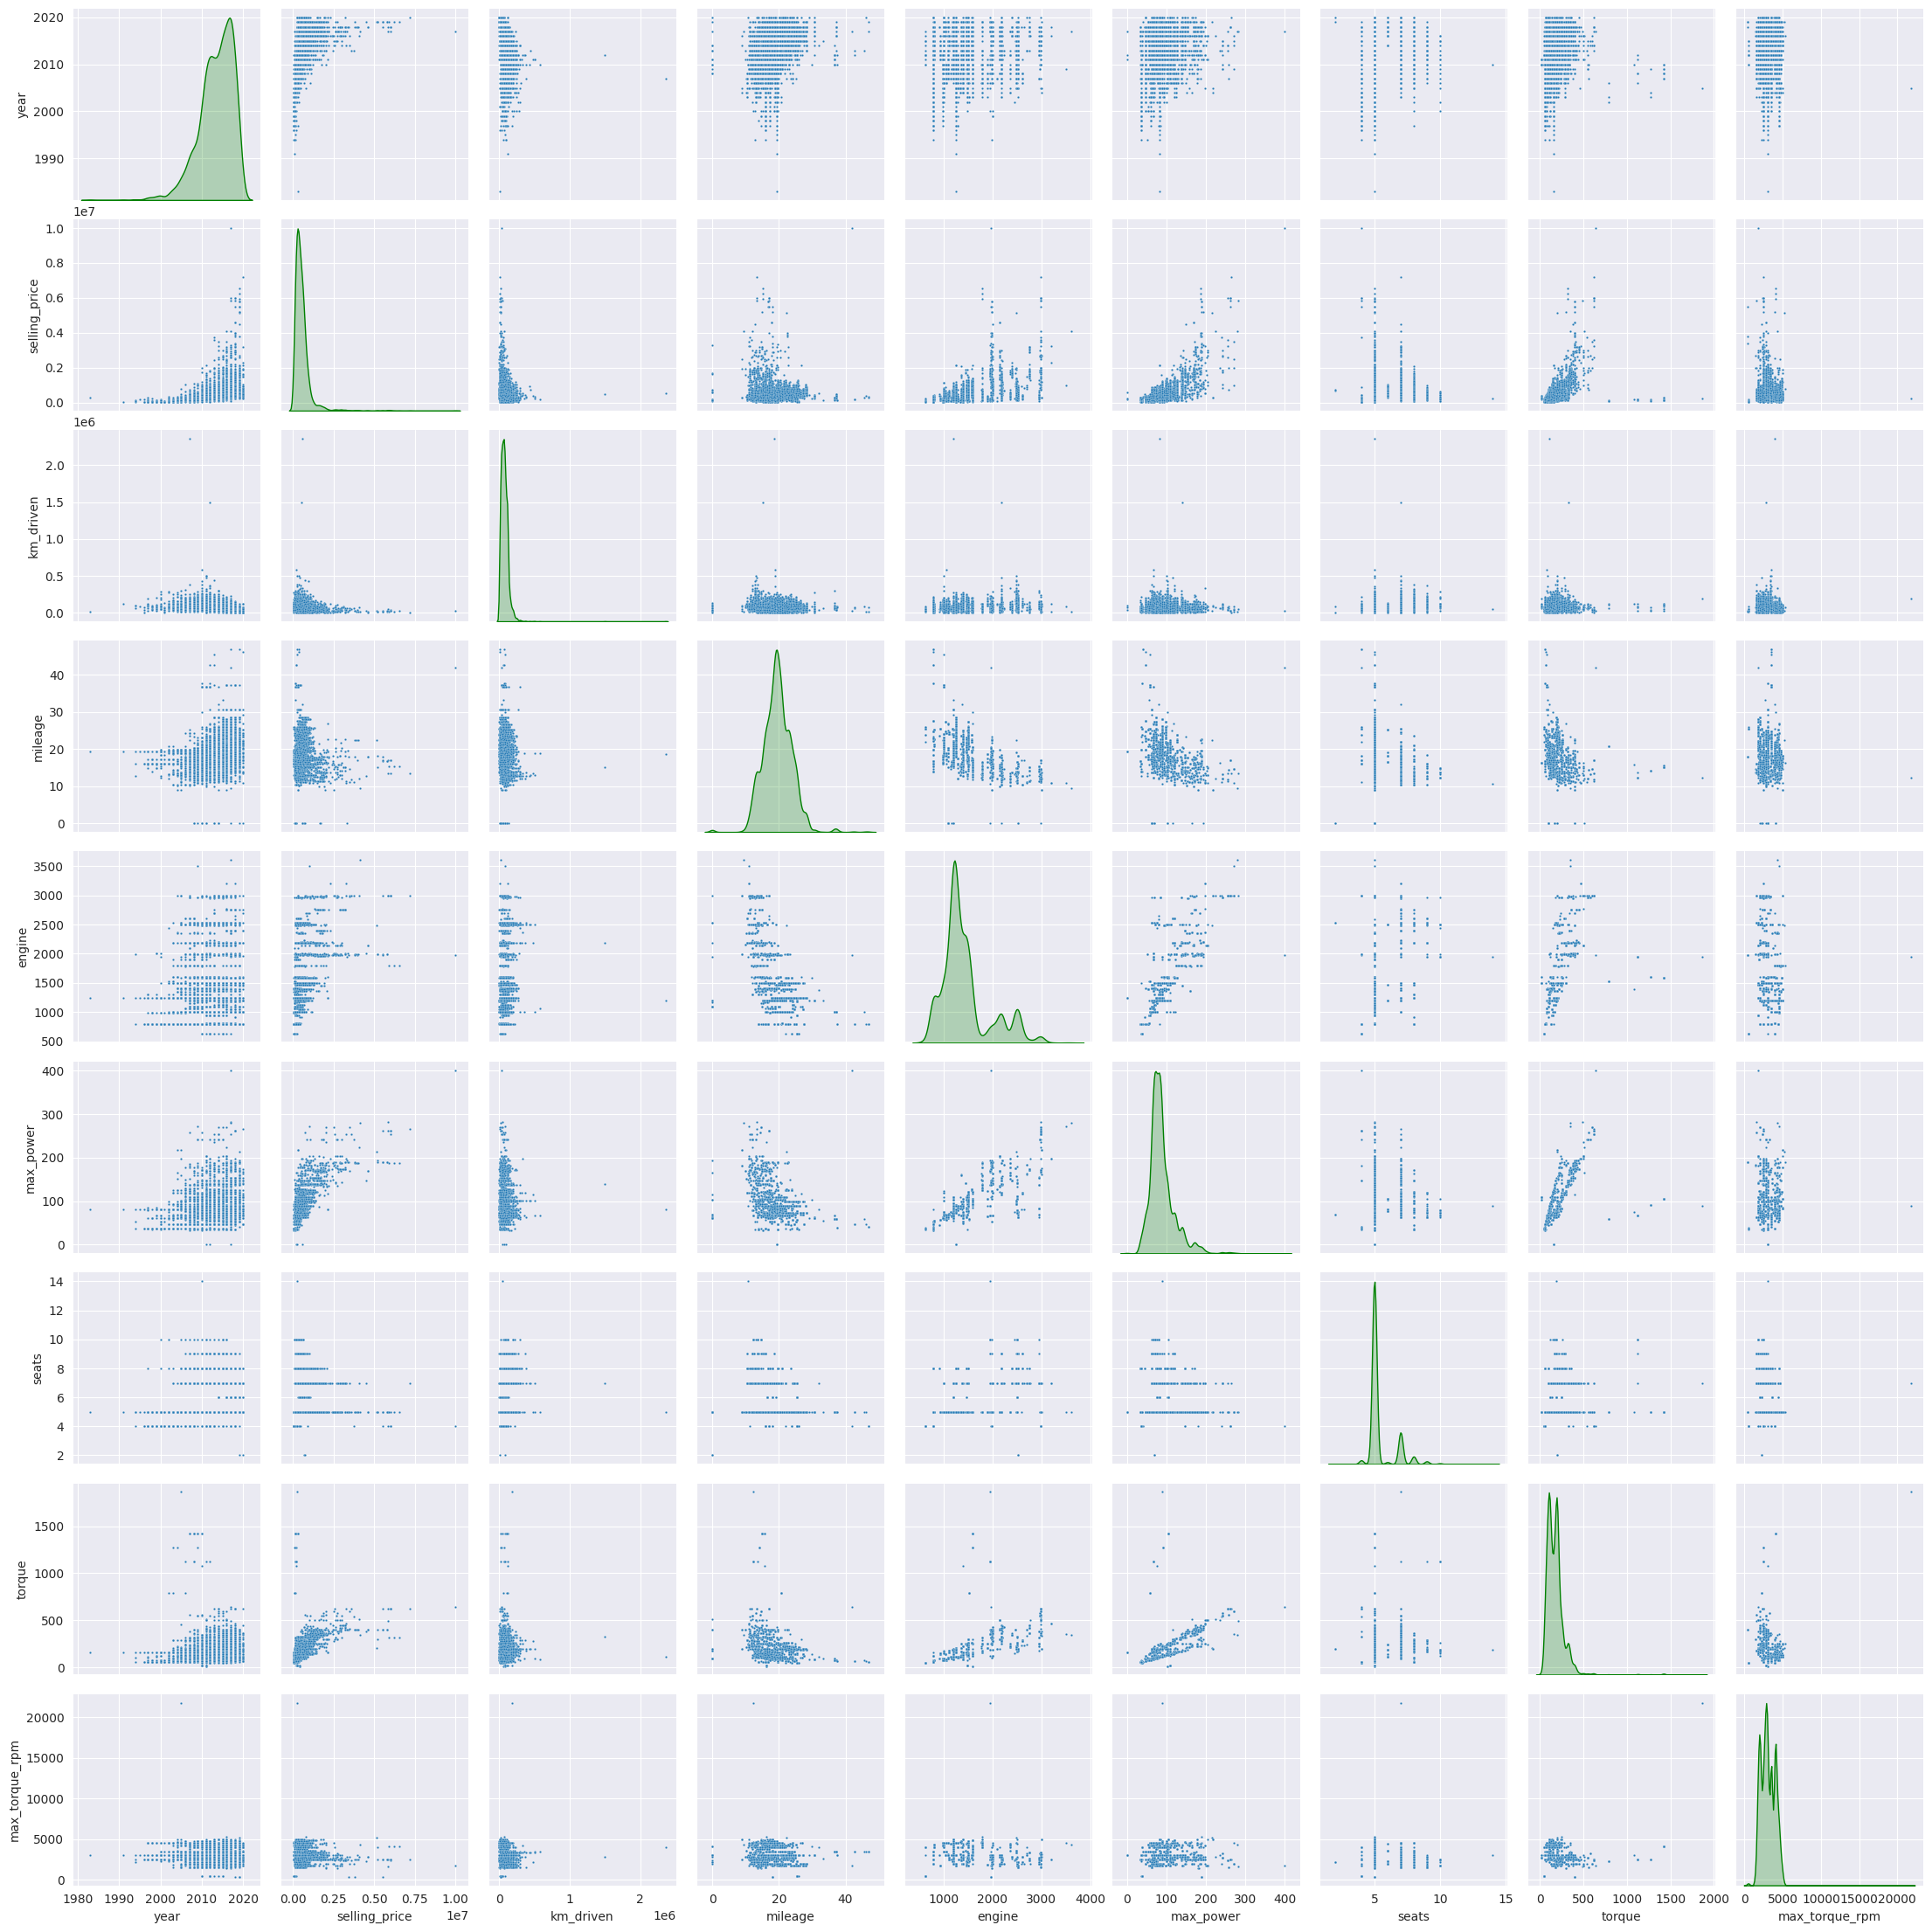

In [17]:
sns.pairplot(df_train, diag_kind='kde', kind='scatter', plot_kws={"s": 3}, diag_kws={'color':'green'})

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Связь предикторов с целевой переменной:
Возможно есть линейная зависимость между целевой переменной и признаками torque и max_power, и нелинейная с признаками year и
и engine. Видна корреляция между engine и torque, max_power и torque, engine и max_power.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Совокупности при разделении на трейн и тест похожи

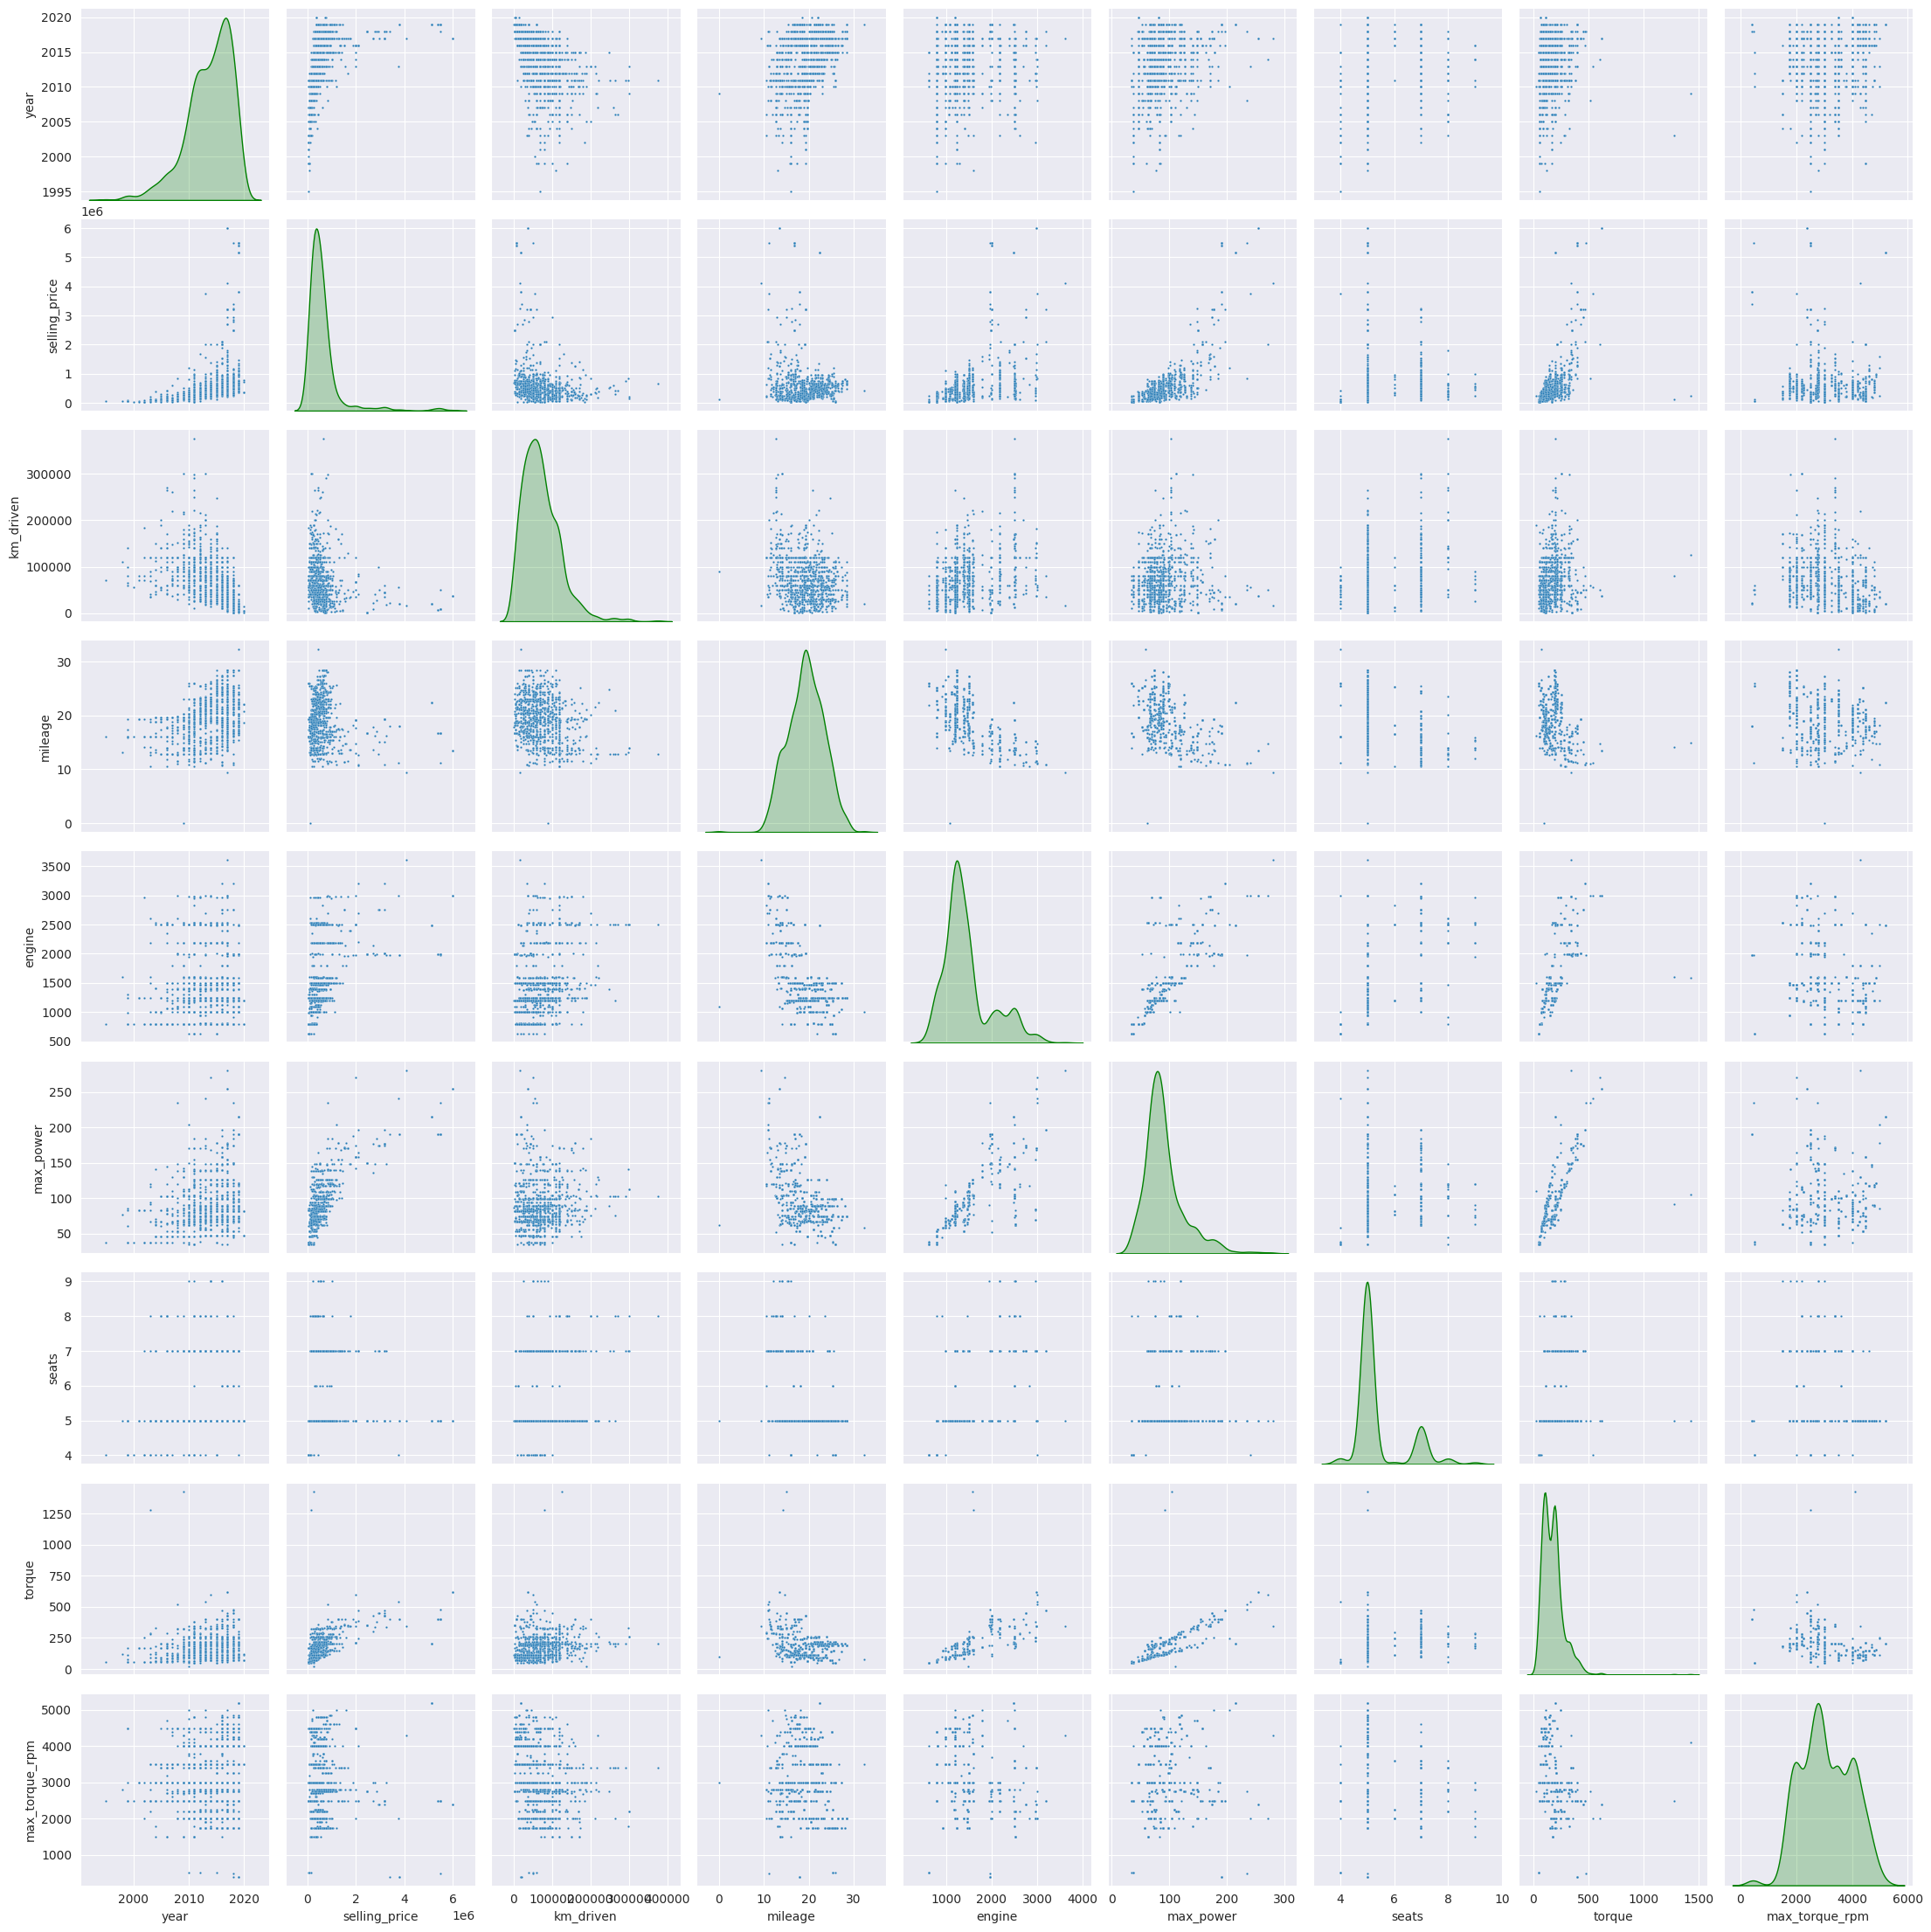

In [123]:
sns.pairplot(df_test, diag_kind='kde', kind='scatter', plot_kws={"s": 3}, diag_kws={'color':'green'})

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

/tmp/ipykernel_516203/4028960429.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap='cubehelix')


<AxesSubplot: >

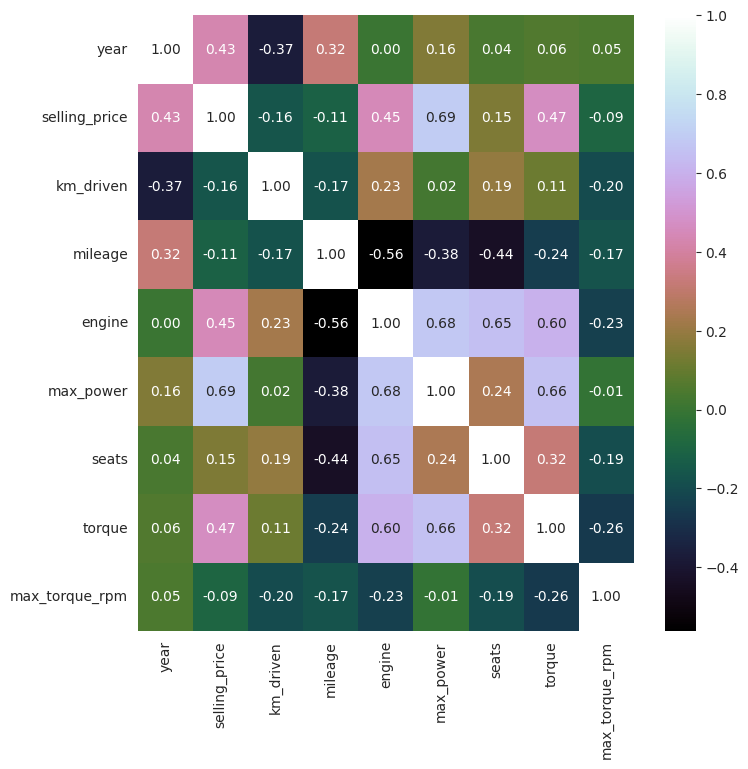

In [18]:
plt.figure(figsize = (8,8))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap='cubehelix')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

<font color='#B1D8B7' size='4'> 1) Признаки engine (объем двигателя) и year (год выпуска) вообще не скоррелированы между собой, их коэффициент корреляции равен нулю. </font>

<font color='#B1D8B7' size='4'>2) Имеется сильная положительная корреляция между признаками max_power (лошадиные силы - л.с.) и engine (объем двигателя) (чем мощнее двигатель, тем больше топливный бак), max_power (л.с.) и seats (кол-во мест) (чем больше мест в машине, тем мощнее двигатель), max_power (л.с.) и torque (крутящий момент) (чем выше крутящий момент двигателя, тем он мощнее), engine (объем двигателя) и seats (кол-во мест) (чем больше мест в машине, тем больше топливный бак), engine (объем двигателя) и torque (крутящий момент) (чем выше крутящий момент двигателя, тем больше топливный бак). Также есть отрицательная корреляция между признаками year и km_driven (пробег) (чем раньше год выпуска тем больше пробег), mileage (миль на литр) и engine (объем двигателя) (у автомобилей с большим баком расход топлива выше).</font>

<font color='#B1D8B7' size='4'>3) Да, можно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи, потому что коэффициент корреляции между этими двумя признаками -0.37. Таким образом, имеется отрицательная нелинейная зависимость пробега от года выпуска. </font>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot: xlabel='max power, bhp', ylabel='engine volume, CC'>

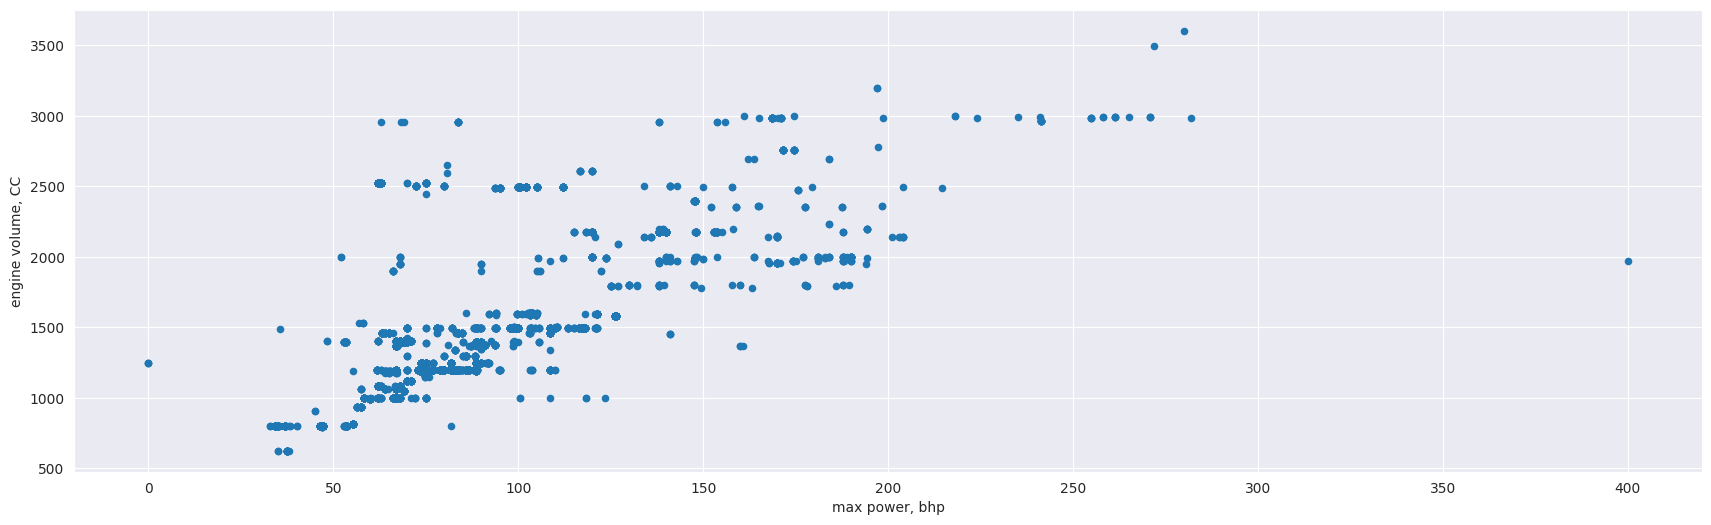

In [19]:
df_train.plot(x='max_power', y='engine', kind='scatter', figsize=(21, 6), xlabel='max power, bhp', ylabel='engine volume, CC')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Проверим зависимость цены от года - ближе к квадратичной, есть выбросы

<AxesSubplot: xlabel='year', ylabel='selling_price'>

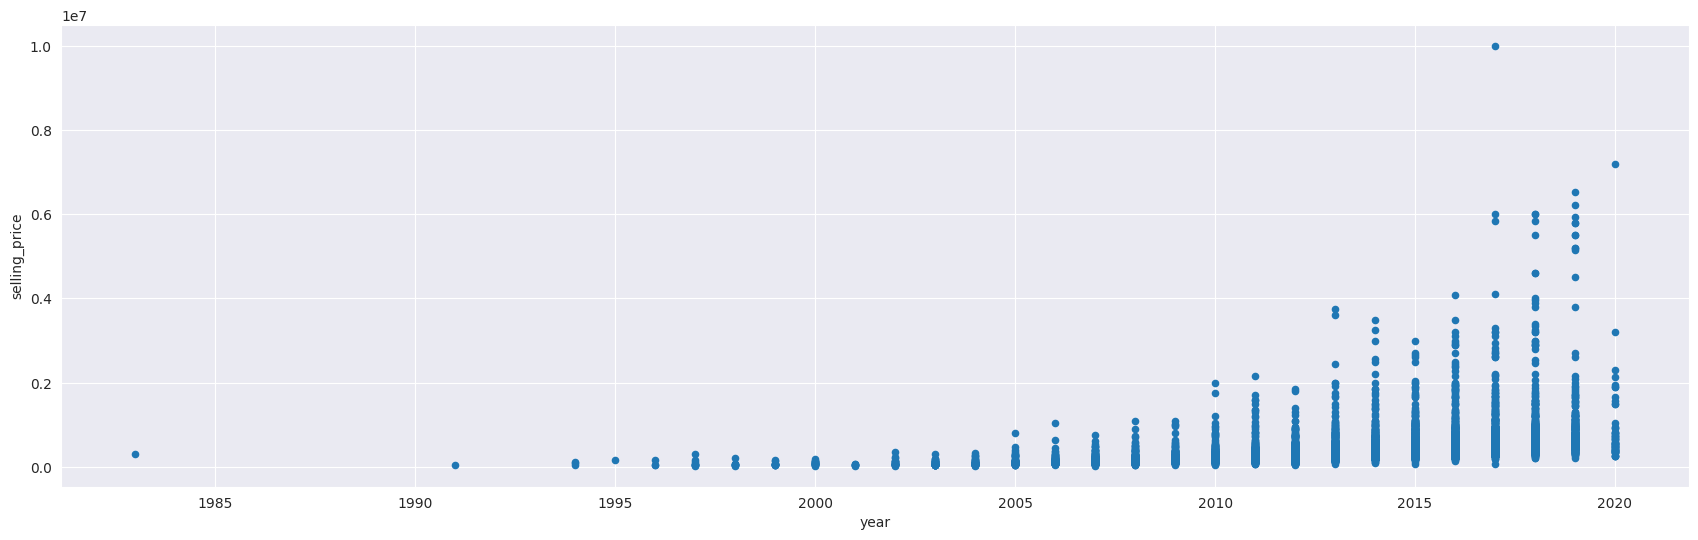

In [20]:
df_train.plot(x='year', y='selling_price', kind='scatter', figsize=(21, 6))

Проверим зависимость цены от объема двигателя - видны выбросы, похоже линейна, но есть пик в районе 2000

<AxesSubplot: xlabel='engine', ylabel='selling_price'>

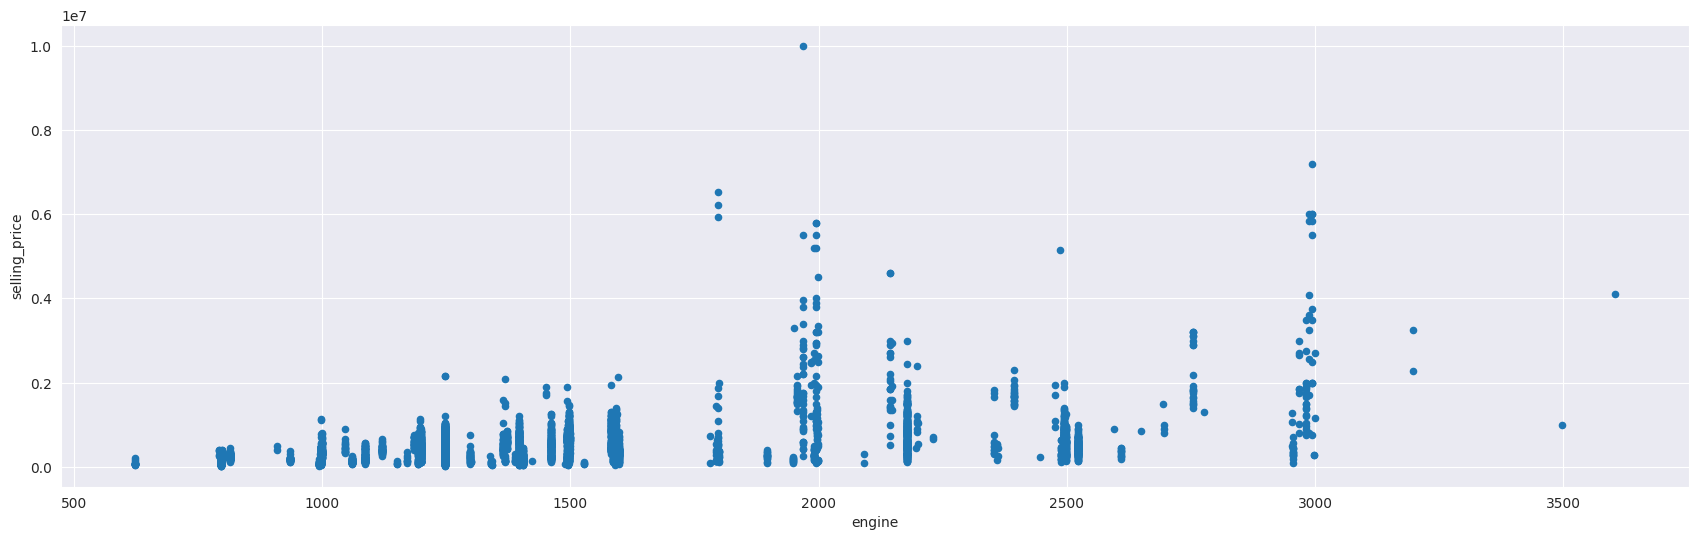

In [128]:
df_train.plot(x='engine', y='selling_price', kind='scatter', figsize=(21, 6))

Проверим зависимость цены от максимальной мощности - скорее линейна, после 2000 значений заметно меньше

<AxesSubplot: xlabel='max_power', ylabel='selling_price'>

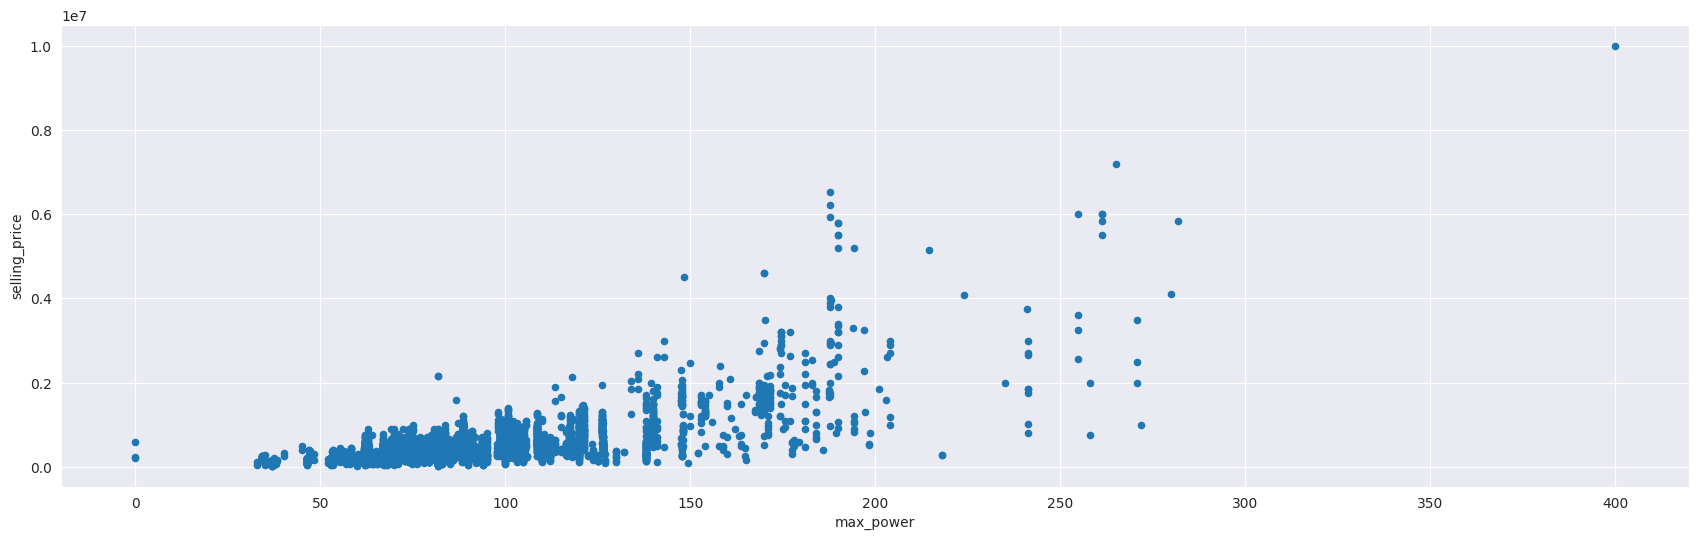

In [129]:
df_train.plot(x='max_power', y='selling_price', kind='scatter', figsize=(21, 6))

Анализ распределений величин. В принципе, распределения видны и на pairplot. max_torque на вид имеет распределние отличное от гаусовского, seats надо делать категориальным признаком. У max_power слишком выраженный пик

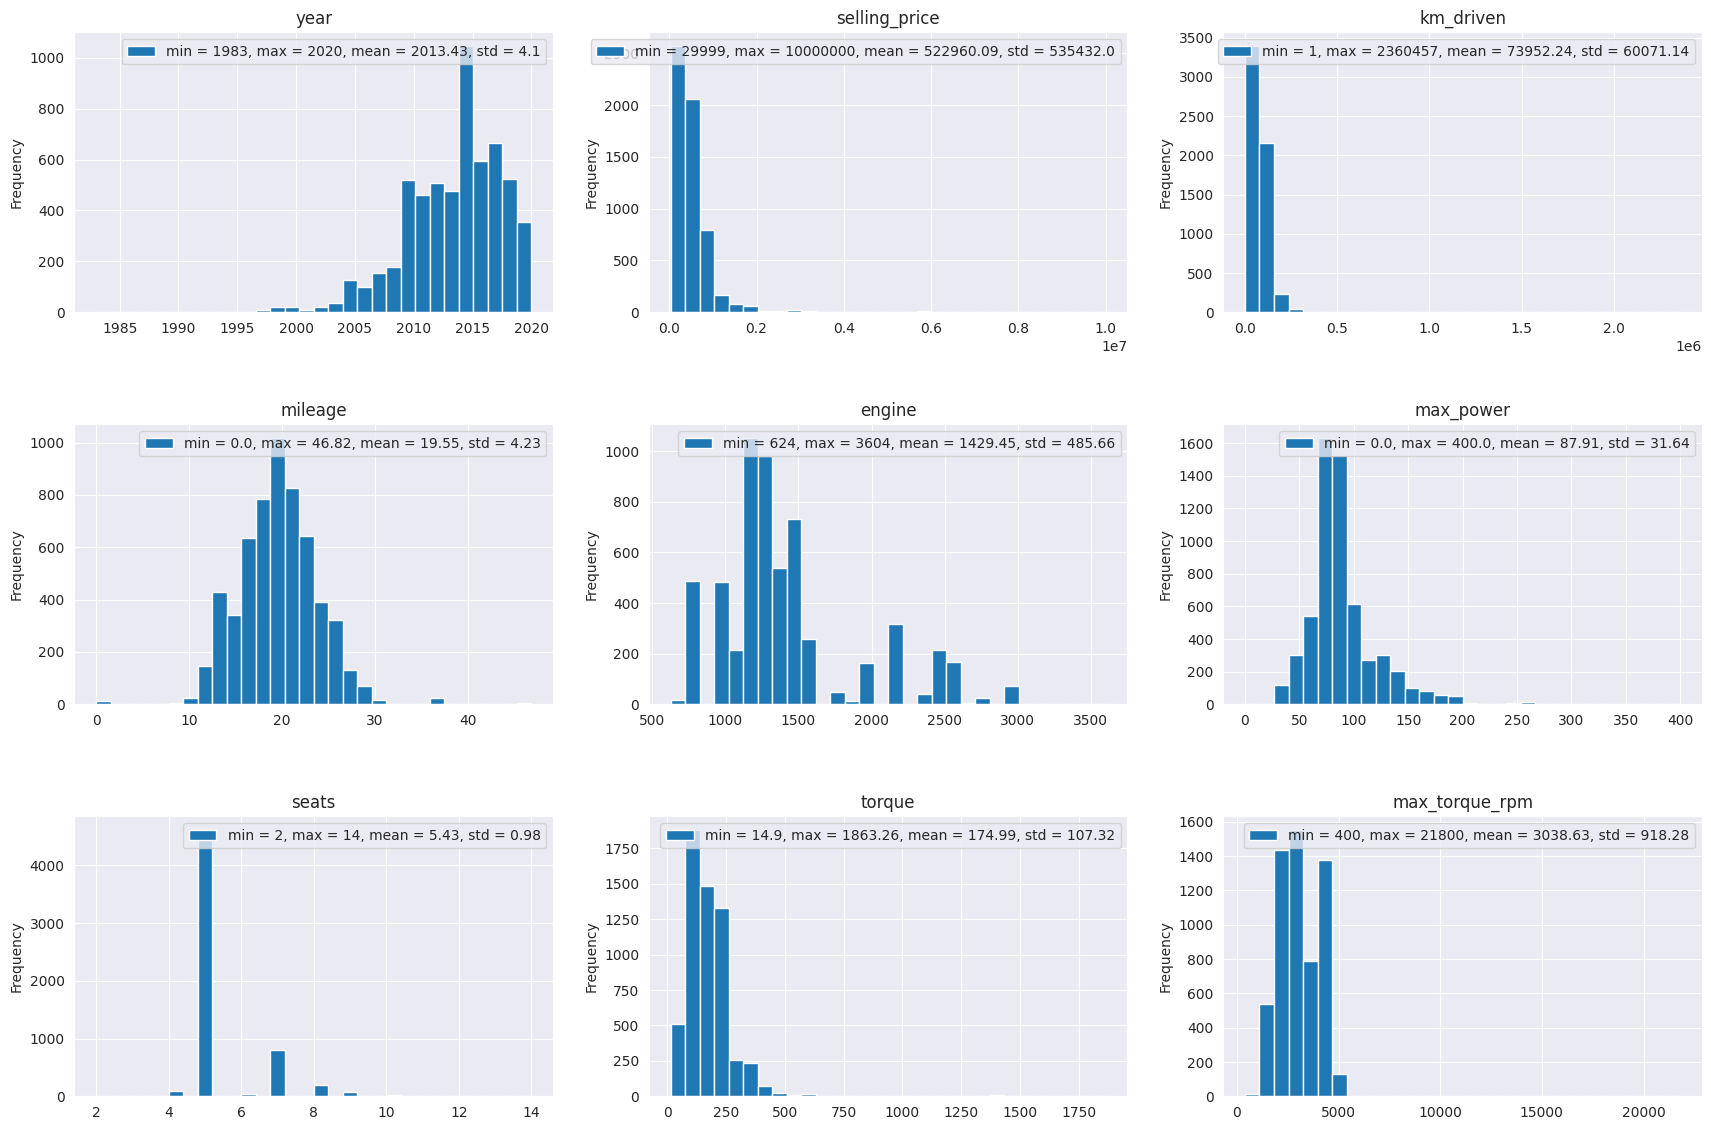

In [21]:
fig = plt.figure(figsize=(21, 24))
cols_val = [c for c in df_train.columns if df_train[c].dtype != object]
i = 0
for c in cols_val:
    axn = fig.add_subplot(531 + i)
    df_train[c].plot.hist(bins=30, title = c, ax = axn, ylabel='')
    i += 1
    plt.legend([f'min = {round(df_train[c].min(), 2)}, max = {round(df_train[c].max(), 2)}, mean = {round(df_train[c].mean(), 2)}, std = {round(df_train[c].std(), 2)}'])
plt.subplots_adjust(hspace=0.4)

Анализ выбросов. Выбросы есть, стоит убрать

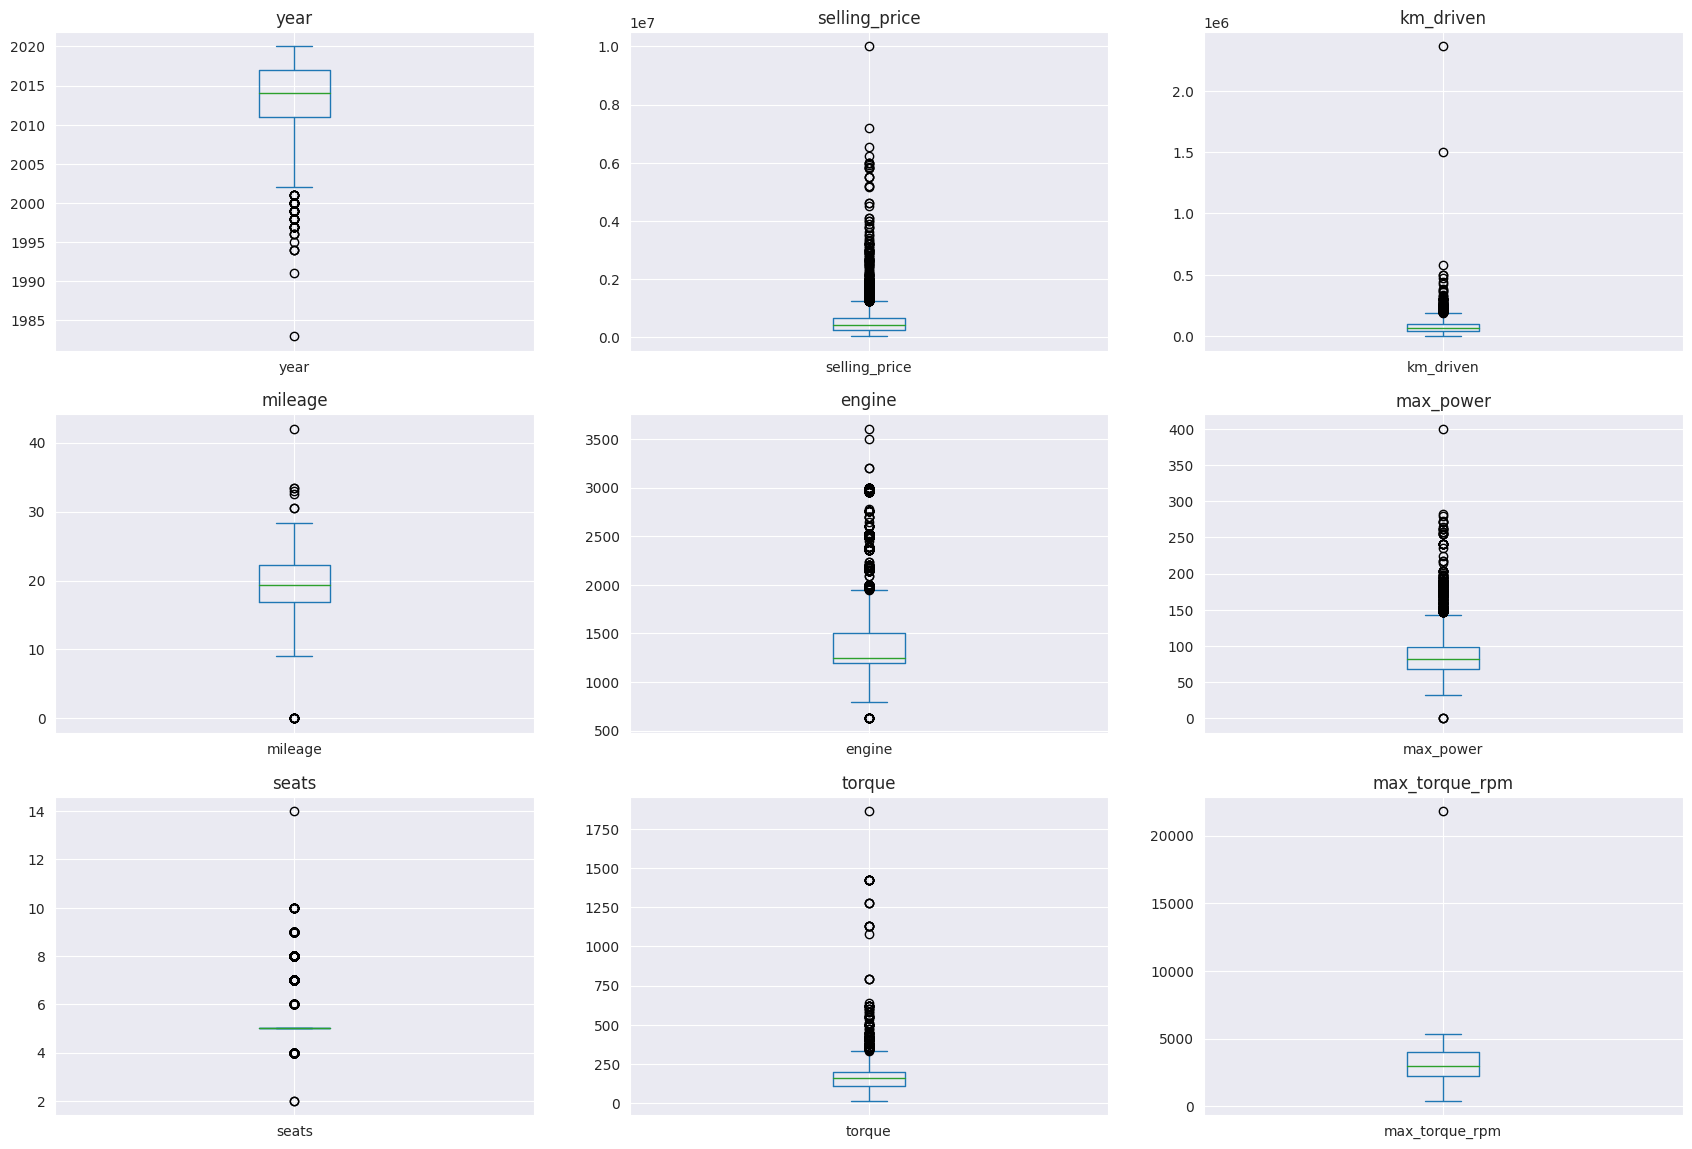

In [165]:
fig = plt.figure(figsize=(21, 24))
cols_val = [c for c in df_train.columns if df_train[c].dtype != object]
i = 0
for c in cols_val:
    axn = fig.add_subplot(531 + i)
    df_train.plot.box(column=c, title = c, ax=axn)
    i += 1

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [25]:
cat_features_and_y_mask = ((df_train.dtypes == "object") | (df_train.columns == 'selling_price')).values
y_train = df_train['selling_price']
X_train = df_train[df_train.columns[~cat_features_and_y_mask]]

In [26]:
#assert X_train.shape == (5840, 6)
#changed to 8 columns, because of 2 torque columns
assert X_train.shape == (5840, 8)

In [27]:
y_test = df_test['selling_price']
X_test = df_test[df_test.columns[~cat_features_and_y_mask]]

In [28]:
#assert X_test.shape == (1000, 6)
#changed to 8 columns, because of 2 torque columns
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [29]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

def calc_metrics(regression_type: str, _y_train, _y_train_pred, _y_test, _y_test_pred, parameters = None, ):
    r2_train = r2_score(_y_train, _y_train_pred)
    mse_train = MSE(_y_train, _y_train_pred)
    r2_test = r2_score(_y_test, _y_test_pred)
    mse_test = MSE(_y_test, _y_test_pred)
    print(f'{regression_type}. Params: {parameters}. TRAIN. R2: {round(r2_train, 2)}. MSE: {round(mse_train, 1)}.')
    print(f'{regression_type}. Params: {parameters}. TEST. R2: {round(r2_test, 2)}. MSE: {round(mse_test, 1)}.')

def show_weights(model):
    w_df = pd.DataFrame(list(zip(X_train.columns, [round(x, 2) for x in model.coef_])), columns=['Feature', 'Value'])
    w_df.loc[w_df.shape[0]] = ['W0', round(model.intercept_, 2)]
    print(f'Weights:')
    display(w_df)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
pred_linear_train = model_linear.predict(X_train)
pred_linear_test = model_linear.predict(X_test)
show_weights(model_linear)
calc_metrics("Linear", y_train, pred_linear_train, y_test, pred_linear_test)
print(f'Selling price mean: {y_train.mean()}')

Weights:


,Feature,Value
0,year,40727.20
1,km_driven,-0.82
2,mileage,-2943.21
3,engine,39.63
4,max_power,10397.18
5,seats,-31165.64
6,torque,86.49
7,max_torque_rpm,-69.21
8,W0,-81967076.47


Linear. Params: None. TRAIN. R2: 0.6. MSE: 113870128287.8.
Linear. Params: None. TEST. R2: 0.61. MSE: 226704882172.7.
Selling price mean: 522960.0910958904


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [31]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_norm_np = standardScaler.transform(X_train)
X_test_norm_np = standardScaler.transform(X_test)

print(f'standardScaler. Var: {standardScaler.var_}, Mean: {standardScaler.mean_}, {standardScaler.scale_}')
X_train_norm = pd.DataFrame(data=X_train_norm_np, columns=X_train.columns)
display(X_train_norm.describe())

X_test_norm = pd.DataFrame(data=X_test_norm_np, columns=X_train.columns)
display(X_test_norm.describe())


standardScaler. Var: [1.67712468e+01 3.60792354e+09 1.58852615e+01 2.35827999e+05
 1.00094465e+03 9.64834397e-01 1.15162321e+04 8.43088330e+05], Mean: [2.01342842e+03 7.39522425e+04 1.94308408e+01 1.42944897e+03
 8.79063707e+01 5.42671233e+00 1.74986853e+02 3.03863151e+03], [4.09527128e+00 6.00659932e+04 3.98563188e+00 4.85621251e+02
 3.16377093e+01 9.82259842e-01 1.07313709e+02 9.18198415e+02]


,year,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
count,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03
mean,2.328122e-14,-6.205082e-17,-9.283290e-16,-1.301851e-16,3.485796e-16,2.640202e-16,-6.083414e-17,9.976799e-17
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-7.430137e+00,-1.231167e+00,-4.875222e+00,-1.658595e+00,-2.778531e+00,-3.488601e+00,-1.491765e+00,-2.873705e+00
25%,-5.929826e-01,-5.818974e-01,-6.224460e-01,-4.786631e-01,-6.291976e-01,-4.344190e-01,-5.888050e-01,-8.588901e-01
50%,1.395696e-01,-6.579834e-02,-1.526502e-02,-3.736430e-01,-1.911128e-01,-4.344190e-01,-1.396546e-01,-4.207316e-02
75%,8.721218e-01,4.336523e-01,7.198756e-01,1.411615e-01,3.506458e-01,-4.344190e-01,2.332241e-01,1.047016e+00
max,1.604674e+00,3.806654e+01,5.662630e+00,4.477875e+00,9.864609e+00,8.728126e+00,1.573213e+01,2.043280e+01


,year,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.061675,-0.042602,-0.023281,0.052360,0.093523,-0.024141,0.024491,0.043372
std,0.979703,0.807216,0.991498,1.074903,1.102726,0.929409,0.967330,0.983995
min,-4.499928,-1.209490,-4.875222,-1.658595,-1.697543,-1.452480,-1.406967,-2.873705
25%,-0.592983,-0.615194,-0.722807,-0.478663,-0.597590,-0.434419,-0.589737,-0.586618
50%,0.139570,-0.207309,-0.025301,-0.373643,-0.151919,-0.434419,-0.037151,-0.042073
75%,0.872122,0.433652,0.719876,0.314136,0.445469,-0.434419,0.279677,1.047016
max,1.604674,5.011950,3.218852,4.477875,6.071667,3.637823,11.619887,2.353923


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [33]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_norm, y_train)
pred_lasso_train = model_lasso.predict(X_train_norm)
pred_lasso_test = model_lasso.predict(X_test_norm)

print(f'Alpha: {round(model_lasso.alpha, 2)}')
show_weights(model_lasso)
calc_metrics("Lasso", y_train, pred_lasso_train, y_test, pred_lasso_test)
print(f'Selling price mean: {round(y_train.mean(), 2)}')

Alpha: 1.0
Weights:


,Feature,Value
0,year,166786.90
1,km_driven,-49064.90
2,mileage,-11727.36
3,engine,19243.50
4,max_power,328944.13
5,seats,-30609.06
6,torque,9280.82
7,max_torque_rpm,-63545.48
8,W0,522960.09


Lasso. Params: None. TRAIN. R2: 0.6. MSE: 113870128300.0.
Lasso. Params: None. TEST. R2: 0.61. MSE: 226705661611.7.
Selling price mean: 522960.09


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [34]:
indices  = [index for (index, item) in enumerate(model_lasso.coef_) if item == "0"]
display(indices)
print(f'L1-регуляризация с параметрами по умолчанию не занулила никакие веса, потому что вероятно параметр регуляризации не подходит.')

[]

L1-регуляризация с параметрами по умолчанию не занулила никакие веса, потому что вероятно параметр регуляризации не подходит.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [35]:
from sklearn.linear_model import LassoCV

model_lassoCv = LassoCV(cv=10, random_state=41)
model_lassoCv.fit(X_train_norm, y_train)
# print(f'Score train alpha: {round(model_lassoCv.score(X_train_norm, y_train), 2)}')
# print(f'Score test alpha: {round(model_lassoCv.score(X_test_norm, y_test), 2)}')
pred_lassoCv_train = model_lassoCv.predict(X_train_norm)
pred_lassoCv_test = model_lassoCv.predict(X_test_norm)

print(f'Alpha: {round(model_lassoCv.alpha_, 2)}')
show_weights(model_lassoCv)
calc_metrics("Lasso", y_train, pred_lassoCv_train, y_test, pred_lassoCv_test)
print(f'Selling price mean: {round(y_train.mean(), 2)}')

Alpha: 7452.71
Weights:


,Feature,Value
0,year,155430.23
1,km_driven,-41745.17
2,mileage,-0.00
3,engine,0.00
4,max_power,337037.88
5,seats,-4781.25
6,torque,5336.56
7,max_torque_rpm,-52274.56
8,W0,522960.09


Lasso. Params: None. TRAIN. R2: 0.6. MSE: 114408661606.5.
Lasso. Params: None. TEST. R2: 0.59. MSE: 232958804329.2.
Selling price mean: 522960.09


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [36]:
print(f'Грид-сёрчу пришлось обучать {model_lassoCv.n_alphas * 10} моделей')

Грид-сёрчу пришлось обучать 1000 моделей


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [37]:
indices  = [index for (index, item) in enumerate(model_lassoCv.coef_) if item == 0]
zero_cols = X_train.columns[indices]
print(f'L1-регуляризация с подобранный коэффициентом {round(model_lassoCv.alpha_, 2)} занулила занулила веса при {zero_cols.values}.')

L1-регуляризация с подобранный коэффициентом 7452.71 занулила занулила веса при ['mileage' 'engine'].


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [38]:
from sklearn.linear_model import ElasticNetCV

model_elasticCV = ElasticNetCV(cv=10, random_state=41)
model_elasticCV.fit(X_train_norm, y_train)
print(f'Best alpha: {round(model_elasticCV.alpha_, 2)}, best_ratio: {round(model_elasticCV.l1_ratio_, 2)}')
#print(f'Score train alpha: {round(model_elasticCV.score(X_train_norm, y_train), 2)}')
#print(f'Score test alpha: {round(model_elasticCV.score(X_test_norm, y_test), 2)}')

pred_elasticCV_train = model_elasticCV.predict(X_train_norm)
pred_elasticCV_test = model_elasticCV.predict(X_test_norm)

show_weights(model_elasticCV)
calc_metrics("Lasso", y_train, pred_elasticCV_train, y_test, pred_elasticCV_test)
print(f'Selling price mean: {round(y_train.mean(), 2)}')

Best alpha: 741.85, best_ratio: 0.5
Score train alpha: 0.01
Score test alpha: -0.01
Weights:


,Feature,Value
0,year,613.45
1,km_driven,-236.58
2,mileage,-147.90
3,engine,639.99
4,max_power,993.43
5,seats,212.32
6,torque,668.43
7,max_torque_rpm,-130.97
8,W0,522960.09


Lasso. Params: None. TRAIN. R2: 0.01. MSE: 284879628941.6.
Lasso. Params: None. TEST. R2: -0.01. MSE: 581017483311.7.
Selling price mean: 522960.09


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [39]:
print(f'Лучший коэффициент для части с L1-регуляризацией: {round(model_elasticCV.alpha_*model_elasticCV.l1_ratio_, 2)}, '
      f'для части с L2-регуляризацией {round(0.5*model_elasticCV.alpha_*(1-model_elasticCV.l1_ratio_), 2)}')

Лучший коэффициент для части с L1-регуляризацией: 370.92, для части с L1-регуляризацией 185.46


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [74]:
df_train['seats'] = df_train['seats'].astype(object)
X_train_cat = df_train[df_train.columns[df_train.dtypes == 'object']]
X_train_cat = X_train_cat.drop(['name'], axis=1)
df_test['seats'] = df_test['seats'].astype(object)
X_test_cat = df_test[df_test.columns[df_test.dtypes == 'object']]
X_test_cat = X_test_cat.drop(['name'], axis=1)
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


In [81]:
assert X_train_cat.shape == (5840, 5)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
oe = OrdinalEncoder(categories=[['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'],[2,4,5,6,7,8,9,10,14]])
ct = ColumnTransformer(transformers=[
    ("ohe", ohe, ['fuel', 'seller_type', 'transmission']),
    ("oe",oe,  ['owner', 'seats'])],
    remainder='passthrough'
)
ct.set_output(transform="pandas")

ct.fit(X_train_cat)
X_train_ohe = ct.transform(X_train_cat)
X_test_ohe = ct.transform(X_test_cat)
X_train_ohe.head()

,ohe__fuel_Diesel,ohe__fuel_LPG,ohe__fuel_Petrol,ohe__seller_type_Individual,ohe__seller_type_Trustmark Dealer,ohe__transmission_Manual,oe__owner,oe__seats
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
1,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [94]:
X_train_norm_cat = pd.concat([X_train_ohe, X_train_norm], axis=1)
X_test_norm_cat = pd.concat([X_test_ohe, X_test_norm], axis=1)
X_train_norm_cat.head()

,ohe__fuel_Diesel,ohe__fuel_LPG,ohe__fuel_Petrol,ohe__seller_type_Individual,ohe__seller_type_Trustmark Dealer,ohe__transmission_Manual,oe__owner,oe__seats,year,km_driven,mileage,engine,max_power,seats,torque,max_torque_rpm
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.139570,1.191152,0.995867,-0.373643,-0.439550,-0.434419,0.139900,-1.131162
1,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.139570,0.766619,0.428830,0.141162,0.493513,-0.434419,0.699008,-0.586618
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,-0.837167,0.883158,0.895506,-0.068879,0.066175,-0.434419,0.416379,-0.314345
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.434419,-0.579673,1.591561
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.434419,-0.570634,1.047016


Судя по метрике R2 качество предсказаний немного (на пару десятых) улучшилось

In [146]:
from sklearn.linear_model import RidgeCV

def train_ridgeCv(_x_train, _y_train, _x_test, _y_test):
    model_ridgeCV = RidgeCV(cv=10)
    model_ridgeCV.fit(_x_train, _y_train)
    print(f'Best alpha: {round(model_ridgeCV.alpha_, 2)}')
    #pred_ridgeCV_train = model_ridgeCV.predict(_x_train)
    #pred_ridgeCV_test = model_ridgeCV.predict(_x_test)
    show_weights(model_ridgeCV)
    #calc_metrics("Ridge", _y_train, pred_ridgeCV_train, _y_test, pred_ridgeCV_test)
    print(f'Score train: {round(model_ridgeCV.score(_x_train, _y_train), 2)}')
    print(f'Score test: {round(model_ridgeCV.score(_x_test, _y_test), 2)}')
    print(f'Selling price mean: {round(y_train.mean(), 2)}')

In [147]:
train_ridgeCv(X_train_norm_cat, y_train, X_test_norm_cat, y_test)

Best alpha: 10.0
Weights:


,Feature,Value
0,year,-99421.27
1,km_driven,114776.01
2,mileage,-15.51
3,engine,-119109.36
4,max_power,-94365.71
5,seats,-293857.34
6,torque,-37086.20
7,max_torque_rpm,789.91
8,W0,1005796.59


Score train: 0.64
Score test: 0.66
Selling price mean: 522960.09


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Загрузка неизмененных датасетов для создания пайплайнов на основе анализа, выполненного ранее.  Разделение датасетов на признаки и целевые переменныею удаление столбца name

In [15]:
import pandas as pd
from cartransformer import CarTransformer
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

CarTransformer.drop_duplicates(df_train)
CarTransformer.drop_duplicates(df_test)

df_train = CarTransformer.transform_value_columns(df_train)
df_test = CarTransformer.transform_value_columns(df_test)

x_train, y_train = CarTransformer.split_dataset(df_train)
x_test, y_test = CarTransformer.split_dataset(df_test)

x_train = x_train.drop(['name'], axis=1)
x_test = x_test.drop(['name'], axis=1)

Создание pipeline'ов для числовых и категориальных признаков. Проверка их работы

In [16]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

categorical_pipeline_ohe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

categorical_pipeline_oe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('oe', OrdinalEncoder(categories=[['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'],[2,4,5,6,7,8,9,10,14]]))
])

ct_transformer = ColumnTransformer(transformers=[
    ('number', numeric_pipeline,  ['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']),
    ('category_ohe', categorical_pipeline_ohe, ['fuel', 'seller_type', 'transmission']),
    ('category_oe', categorical_pipeline_oe, ['owner', 'seats'])
], remainder='passthrough')

ct_transformer.set_output(transform="pandas")

ct_transformer.fit(x_train)
x_train_ohe = ct_transformer.transform(x_train)
x_test_ohe = ct_transformer.transform(x_test)
x_train_ohe.head()

,number__mileage,number__engine,number__max_power,number__torque,number__max_torque_rpm,category_ohe__fuel_Diesel,category_ohe__fuel_LPG,category_ohe__fuel_Petrol,category_ohe__seller_type_Individual,category_ohe__seller_type_Trustmark Dealer,category_ohe__transmission_Manual,category_oe__owner,category_oe__seats,remainder__year,remainder__km_driven
0,0.911282,-0.373643,-0.439550,0.139900,-1.131162,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2014,145500
1,0.376744,0.141162,0.493513,0.699008,-0.586618,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2014,120000
2,0.816673,-0.068879,0.066175,0.416379,-0.314345,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2010,127000
3,-0.815322,-0.270682,0.009281,-0.579673,1.591561,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2007,120000
4,0.140223,-0.478663,-0.191113,-0.570634,1.047016,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,2017,45000


#### Проба: квадрат года

In [17]:
x_train_year2 = x_train.copy()
x_train_year2['year'] = (x_train['year'] - 1995)**2
x_test_year2 = x_test.copy()
x_test_year2['year'] = (x_test['year'] - 1995) ** 2
x_train_year2.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,361,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.0
1,361,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.0
2,225,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.67,5.0,2750.0
3,144,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.78,5.0,4500.0
4,484,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0,4000.0


#### Проба: выбросы

Проверка выбросов

In [152]:
def get_outliers_mask(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    mask = (series < (q1 - 3 * iqr)) | (series > (q3 + 3 * iqr))
    return mask

def get_outliers_frame(_frame, _col) -> pd.DataFrame:
    series = _frame[_col]
    mask = get_outliers_mask(series)
    return _frame[mask]

def get_outliers_series(series) -> pd.Series:
    mask = get_outliers_mask(series)
    return series[mask]

In [132]:
cols_val = [c for c in df_train.columns if df_train[c].dtype != object and c != 'seats' ]
out_indexes = []
for c in cols_val:
    df = get_outliers_frame(df_train, c)
    part_out = round(df.shape[0]/df_train.shape[0] * 100, 2)
    #уберем только выбросы, которых менее 5%
    if part_out < 5.0:
        out_indexes.extend(df.index.tolist())
    print(f'Доля выбросов по столбцу {c}: {part_out}')

out_indexes = list(set(out_indexes))
print(f'Доля выбросов для удаления: {round(len(out_indexes)/df_train.shape[0] * 100, 2)}')

Доля выбросов по столбцу year: 0.03
Доля выбросов по столбцу selling_price: 2.29
Доля выбросов по столбцу km_driven: 0.45
Доля выбросов по столбцу mileage: 0.12
Доля выбросов по столбцу engine: 8.36
Доля выбросов по столбцу max_power: 0.79
Доля выбросов по столбцу torque: 1.03
Доля выбросов по столбцу max_torque_rpm: 0.02
Доля выбросов для удаления: 3.49


Удаление выбросов

In [133]:
clean_data = np.setdiff1d(df_train.index.tolist(), out_indexes)
x_train_clean = x_train.loc[clean_data]
y_train_clean = y_train.loc[clean_data]

#### Проба: выбросы по целевой переменной

In [156]:
y_train_out = get_outliers_series(y_train).index.tolist()
part_out = round(len(y_train_out)/y_train.shape[0] * 100, 2)
print(f'Доля выбросов: {part_out}')

x_train_clean_price = x_train.loc[y_train_out]
y_train_clean_price = y_train.loc[y_train_out]

Доля выбросов: 2.29


#### Простая линейная регрессия показала лучший результат. Протестируем ее с различными изменениями

LinearRegression

In [135]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', linear)
])

linear_pipeline.fit(x_train, y_train)
print(f'LINEAR Score train alpha: {round(linear_pipeline.score(x_train, y_train), 4)}')
print(f'LINEAR Score test alpha: {round(linear_pipeline.score(x_test, y_test), 4)}')

LINEAR Score train alpha: 0.6352
LINEAR Score test alpha: 0.6709


LinearRegression без части выбросов по признакам

In [136]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', linear)
])

linear_pipeline.fit(x_train_clean, y_train_clean)
print(f'LINEAR NO OUTLIERS Score train alpha: {round(linear_pipeline.score(x_train_clean, y_train_clean), 4)}')
print(f'LINEAR NO OUTLIERS  Score test alpha: {round(linear_pipeline.score(x_test, y_test), 4)}')

LINEAR NO OUTLIERS Score train alpha: 0.7157
LINEAR NO OUTLIERS  Score test alpha: 0.528


Вывод: score на train улучшился, а на тесте стал хуже. Видимо в тесте есть существенные выбросы. Не будем их удалять

LinearRegression без выбросов по цене

In [157]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', linear)
])

linear_pipeline.fit(x_train_clean_price, y_train_clean_price)
print(f'LINEAR NO OUTLIERS SELLING_PRICE Score train alpha: {round(linear_pipeline.score(x_train_clean_price, y_train_clean_price), 4)}')
print(f'LINEAR NO OUTLIERS SELLING_PRICE Score test alpha: {round(linear_pipeline.score(x_test, y_test), 4)}')

LINEAR NO OUTLIERS SELLING_PRICE Score train alpha: 0.6395
LINEAR NO OUTLIERS SELLING_PRICE Score test alpha: -7.7602


/home/alexna/work/projects/mlcarspredictor/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:182: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Вывод: score на train не изменился, а на тесте стал намного хуже. Видимо в тесте есть существенные выбросы по цене или это не выбросы. Выбросы по цене удалять нельзя

Квадратичный год

In [18]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', linear)
])

linear_pipeline.fit(x_train_year2, y_train)
print(f'LINEAR NO OUTLIERS Score train alpha: {round(linear_pipeline.score(x_train_year2, y_train), 4)}')
print(f'LINEAR NO OUTLIERS  Score test alpha: {round(linear_pipeline.score(x_test_year2, y_test), 4)}')

LINEAR NO OUTLIERS Score train alpha: 0.6486
LINEAR NO OUTLIERS  Score test alpha: 0.6803


Вывод: score и на train, и на test немного улучшился. Значит год полезно оставить квадратным

In [26]:
x_train['year'] = (x_train['year'] - 1995) ** 2
x_test['year'] = (x_test['year'] - 1995) ** 2

#### Повторно проверим линенйные регрессии с регуляризацией на полном pipeline

Lasso regression

In [28]:
from sklearn.linear_model import Lasso

#lasso = Lasso(alpha=7452.71)
lasso = Lasso(alpha=1300)
lasso_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', lasso)
])

lasso_pipeline.fit(x_train, y_train)
print(f'LASSO Score train alpha: {round(lasso_pipeline.score(x_train, y_train), 4)}')
print(f'LASSO Score train alpha: {round(lasso_pipeline.score(x_test, y_test), 4)}')

LASSO Score train alpha: 0.6402
LASSO Score train alpha: 0.6643


In [29]:
from sklearn.linear_model import Lasso

#lasso = Lasso(alpha=7452.71)
lasso = Lasso(alpha=1)
lasso_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', lasso)
])

lasso_pipeline.fit(x_train, y_train)
print(f'LASSO Score train alpha: {round(lasso_pipeline.score(x_train, y_train), 4)}')
print(f'LASSO Score train alpha: {round(lasso_pipeline.score(x_test, y_test), 4)}')

LASSO Score train alpha: 0.6486
LASSO Score train alpha: 0.6803


In [69]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_dict = {'model__alpha': np.arange(1, 1000, 10)}
search = GridSearchCV(lasso_pipeline, param_dict,
                      cv=10,
                      scoring='r2')

search.fit(x_train, y_train)
print(f'Best score: {round(search.best_score_, 2)}')
print(f'Best alpha:, {search.best_params_}')

Best score: 0.61
Best alpha:, {'model__alpha': 991}


In [66]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1, l1_ratio=1)
elastic_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', elastic)
])

elastic_pipeline.fit(x_train, y_train)
print(f'ELASTIC Score train alpha: {round(elastic_pipeline.score(x_train, y_train), 4)}')
print(f'ELASTIC Score train alpha: {round(elastic_pipeline.score(x_test, y_test), 4)}')

ELASTIC Score train alpha: 0.6352
ELASTIC Score train alpha: 0.6709


In [64]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=741.85, l1_ratio=0.5)
elastic_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', elastic)
])

elastic_pipeline.fit(x_train, y_train)
print(f'ELASTIC Score train alpha: {round(elastic_pipeline.score(x_train, y_train), 4)}')
print(f'ELASTIC Score train alpha: {round(elastic_pipeline.score(x_test, y_test), 4)}')


ELASTIC Score train alpha: 0.0445
ELASTIC Score train alpha: 0.0474


In [67]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=741.85, l1_ratio=0.5)
elastic_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', elastic)
])

elastic_pipeline.fit(x_train, y_train)
print(f'ELASTIC Score train alpha: {round(elastic_pipeline.score(x_train, y_train), 4)}')
print(f'ELASTIC Score train alpha: {round(elastic_pipeline.score(x_test, y_test), 4)}')

ELASTIC Score train alpha: 0.0445
ELASTIC Score train alpha: 0.0474


In [68]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_dict = {'model__alpha': np.arange(1, 1000, 10), 'model__l1_ratio': np.arange(0, 1, 0.1),}
search = GridSearchCV(elastic_pipeline, param_dict,
                      cv=10,
                      scoring='r2')

search.fit(x_train, y_train)
print(f'Best score:, {round(search.best_score_, 4)}')
print(f'Best params:, {search.best_params_}')

/home/alexna/work/projects/mlcarspredictor/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.401e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/alexna/work/projects/mlcarspredictor/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.372e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more effi

Best score:, 0.6085
Best params:, {'model__alpha': 1, 'model__l1_ratio': 0.9}


Ridge

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', ridge)
])

ridge_pipeline.fit(x_train, y_train)
print(f'RIDGE Score train alpha: {round(ridge_pipeline.score(x_train, y_train), 4)}')
print(f'RIDGE Score train alpha: {round(ridge_pipeline.score(x_test, y_test), 4)}')

RIDGE Score train alpha: 0.6486
RIDGE Score train alpha: 0.6803


In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', ridge)
])

ridge_pipeline.fit(x_train, y_train)
print(f'RIDGE Score train alpha: {round(ridge_pipeline.score(x_train, y_train), 4)}')
print(f'RIDGE Score train alpha: {round(ridge_pipeline.score(x_test, y_test), 4)}')

RIDGE Score train alpha: 0.6485
RIDGE Score train alpha: 0.6796


In [62]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=120)
ridge_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', ridge)
])

ridge_pipeline.fit(x_train, y_train)
print(f'RIDGE Score train alpha: {round(ridge_pipeline.score(x_train, y_train), 4)}')
print(f'RIDGE Score train alpha: {round(ridge_pipeline.score(x_test, y_test), 4)}')

RIDGE Score train alpha: 0.6333
RIDGE Score train alpha: 0.6641


In [58]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_dict = {'model__alpha': np.arange(100, 1000, 10)}
search = GridSearchCV(ridge_pipeline, param_dict,
                      cv=10,
                      scoring='r2')

search.fit(x_train, y_train)
print(f'Best score: {round(search.best_score_, 2)}')
print(f'Best alpha:, {search.best_params_}')

Best score: 0.6131277452339966
Best alpha: {'model__alpha': 120}


Вывод: лучшей моделью осталась простая Линейная регрессия, все остальные линейные модели с регуляризацией показывают наилучшие score при приближении гиперпараметров к простой линейно регрессии.

In [32]:
best_model = LinearRegression()

final_pipeline = Pipeline(steps=[
    ('preprocess', ct_transformer),
    ('model', best_model)
])

final_pipeline.fit(x_train, y_train)
joblib.dump(final_pipeline, 'pipeline.pkl')

['pipeline.pkl']

Проверка сохраненного piplene на train и test

In [33]:
pipeline_check = joblib.load('pipeline.pkl')
y_predict_train = pipeline_check.predict(x_train)
print(f'Saved pipeline Score train: {round(pipeline_check.score(x_train, y_train), 4)}')
y_predict_train[0:5]

Saved pipeline Score train: 0.6486


array([415991.23263884, 640382.19906465, 336598.76685764, 106109.57594907,
       545700.0085911 ])

In [34]:
y_predict_test = pipeline_check.predict(x_test)
print(f'Saved pipeline Score test: {round(pipeline_check.score(x_test, y_test), 4)}')
display(x_test.head(1))
y_predict_test[0:5]

Saved pipeline Score test: 0.6803


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,225,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,2200.0


array([632206.07761886, 873615.90379349, 801383.61049699, 723271.26557185,
       170204.20531628])

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [81]:
def business_metrics(y_true, y_pred):
    qty_10perc = 0
    for i in range(len(y_pred)):
        if y_true[i] != 0:
            pred_perc = abs(y_true[i] - y_pred[i]) / y_true[i] * 100
            if pred_perc <= 10:
                qty_10perc += 1
    return qty_10perc/len(y_pred)

In [83]:
print(f'Кастомная метрика на train: {business_metrics(y_train, y_predict_train)}')
print(f'Кастомная метрика на test: {business_metrics(y_test, y_predict_test)}')

Кастомная метрика на train: 0.21181506849315068
Кастомная метрика на test: 0.23308270676691728


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link